In [1]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from pickle import dump, load
import time
import os

import torch
import tensorflow as tf
import keras
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.preprocessing import image


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **Evaluation**

The following two inference methods are used:
1. Greedy search
2. BLEU score

In [4]:
desciption_generator = keras.models.load_model('/content/gdrive/MyDrive/Deep_Learning/Saved_files/models/trained_model.h5')
desciption_generator.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 37)]         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 37, 200)      331000      input_4[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 2048)         0           input_3[0][0]                    
______________________________________________________________________________________________

### Inference 1: Using Greedy Search

In [7]:
# Retrieving saved data

token_to_idx = load(open('/content/gdrive/MyDrive/Deep_Learning/Saved_files/token_to_idx.pkl', 'rb'))
idx_to_token = load(open('/content/gdrive/MyDrive/Deep_Learning/Saved_files/idx_to_token.pkl', 'rb'))
test_features = load(open('/content/gdrive/MyDrive/Deep_Learning/Saved_files/test_features.pkl', 'rb'))
max_caption = 37

In [14]:
def greedy_search(img):
    start_token = '<start>'
    for i in range(max_caption):
        seq = [token_to_idx[w] for w in start_token.split() if w in token_to_idx]
        seq = keras.preprocessing.sequence.pad_sequences([seq], maxlen=max_caption)
        yhat = desciption_generator.predict([img, seq], verbose=0)
        yhat = np.argmax(yhat)
        token = idx_to_token[yhat]
        start_token += ' ' + token
        if token == '<end>':
            break
    result = start_token.split()
    result = result[1:-1]
    result = ' '.join(result)
    return result

/content/gdrive/MyDrive/Deep_Learning/Flickr8k_Dataset/Flicker8k_Dataset/2677656448_6b7e7702af.jpg


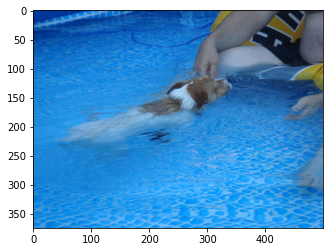

Greedy: a young boy is jumping into a pool
/content/gdrive/MyDrive/Deep_Learning/Flickr8k_Dataset/Flicker8k_Dataset/2654514044_a70a6e2c21.jpg


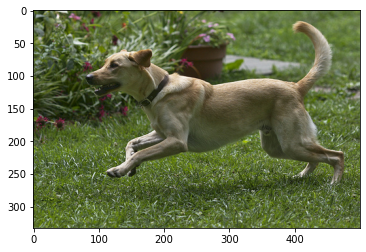

Greedy: a dog runs through the grass
/content/gdrive/MyDrive/Deep_Learning/Flickr8k_Dataset/Flicker8k_Dataset/3110649716_c17e14670e.jpg


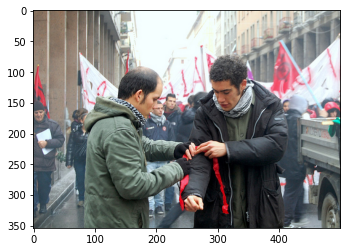

Greedy: a man in a black shirt is standing in front of a shop
/content/gdrive/MyDrive/Deep_Learning/Flickr8k_Dataset/Flicker8k_Dataset/3745451546_fc8ec70cbd.jpg


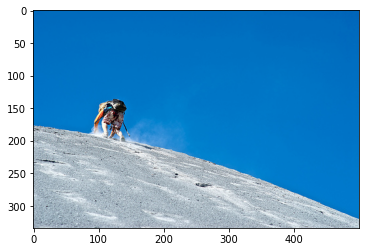

Greedy: a man is standing on top of a cliff overlooking the mountains


In [17]:
root_dir = '/content/gdrive/MyDrive/Deep_Learning/Flickr8k_Dataset/Flicker8k_Dataset/'
feature_length = 2048

idx = [1, 5, 15, 20]
for i in idx:
  img_path = list(test_features.keys())[i]
  print(img_path)
  img = test_features[img_path].reshape((1, feature_length))
  x=plt.imread(img_path)
  plt.imshow(x)
  plt.show()
  print("Greedy:", greedy_search(img))


### Inference - 2: BLEU score

In [20]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import corpus_bleu

reference = [['a', 'brown', 'and', 'white', 'dog', 'swimming', 'towards', 'some', 'in', 'the', 'pool'], 
             ['a', 'dog', 'in', 'a', 'swimming', 'pool', 'swims', 'toward', 'sombody', 'we', 'cannot', 'see'], 
             ['a', 'dog', 'swims', 'in', 'a', 'pool', 'near', 'a', 'person'],
             ['small', 'dog', 'is', 'paddling', 'through', 'the', 'water', 'in', 'a', 'pool'],
             ['the', 'small', 'brown', 'and', 'white', 'dog', 'is', 'in', 'the', 'pool']]
candidate = ['a', 'young', 'boy', 'is', 'jumping', 'into', 'a', 'pool']
score = sentence_bleu(reference, candidate)
print('BLEU score: ', score)

BLEU score:  0.45622720708659226


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [22]:
reference = [['a', 'man', 'helps', 'another', 'man', 'tie', 'a', 'red', 'ribbon', 'onto', 'his', 'arm'],
              ['a', 'man', 'helps', 'tie', 'a', 'red', 'ribbon', 'around', 'another', 'man', 's', 'right', 'arm', 'during', 'a', 'street', 'parade'],
              ['a', 'man', 'is', 'tying', 'a', 'red', 'arm', 'band', 'around', 'another', 'mans', 'arm', 'in', 'the', 'street'],
              ['one', 'man', 'helps', 'another', 'attach', 'a', 'red', 'ribbon', 'to', 'his', 'forearm', 'in', 'the', 'midst', 'of', 'a', 'large', 'group', 'of', 'people'],
              ['two', 'men', 'stand', 'together', 'one', 'is', 'putting', 'something', 'red', 'on', 'his', 'arm']]
candidate = ['a', 'man', 'in', 'a', 'black', 'shirt', 'is', 'standing', 'in', 'front', 'of', 'a', 'shop']
score = sentence_bleu(reference, candidate)
print('BLEU score: ', score)

BLEU score:  0.547332024239071


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [25]:
reference = [['', 'a', 'hiker', 'ascends', 'a', 'snowy', 'hill'], 
              ['', 'a', 'man', 'reaches', 'the', 'top', 'of', 'a', 'tall', 'sand', 'dune'], 
              ['', 'a', 'person', 'is', 'hiking', 'to', 'the', 'top', 'of', 'a', 'hill'], 
              ['', 'a', 'person', 'walks', 'up', 'a', 'white', 'sandy', 'hill', 'against', 'the', 'blue', 'sky'], 
              ['', 'the', 'person', 'is', 'wearing', 'shorts', 'and', 'climbing', 'a', 'gray', 'sand', 'hill', 'under', 'a', 'blue', 'sky']]

candidate = ['a', 'man', 'is', 'standing', 'on', 'top', 'of', 'a', 'cliff', 'overlooking', 'the', 'mountains']
score = sentence_bleu(reference, candidate)
print('BLEU score: ', score)

BLEU score:  0.3551496090063711


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
